In [1]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1/sqrt(2), 1/sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [7]:
display(u.draw('latex'))
display(v.draw('latex'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [4]:
display(u.is_valid())

True

#### SIMULATING MEASUREMENTS

In [14]:
v = Statevector([(1+2.j)/3, -2/3])
v.draw('latex')

<IPython.core.display.Latex object>

In [15]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

{'0': 576, '1': 424}

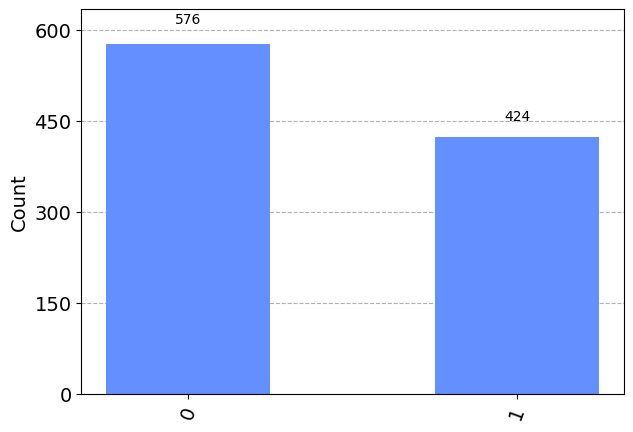

In [16]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)       #sample_counts measures a given number of times the given system
display(statistics)
plot_histogram(statistics)

#### Creating the operators X,Y,Z,H,S and T 

In [18]:
from qiskit.quantum_info import Operator

#Defining the operators:
X = Operator([ [0,1],[1,0] ])
Y = Operator([ [0,-1.j],[1.j,0] ])
Z = Operator([ [1,0],[0,-1] ])
H = Operator([ [1/sqrt(2),1/sqrt(2)],[1/sqrt(2),-1/sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/sqrt(2)] ])

#Defining the Statevector:
v = Statevector([1,0])

#Applying the operators to the statevector:
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

#### Circuits:

In [21]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [22]:
ket0 = Statevector([1,0])

#Applying the circuit to the ket
v = ket0.evolve(circuit)

v.draw('latex')

<IPython.core.display.Latex object>

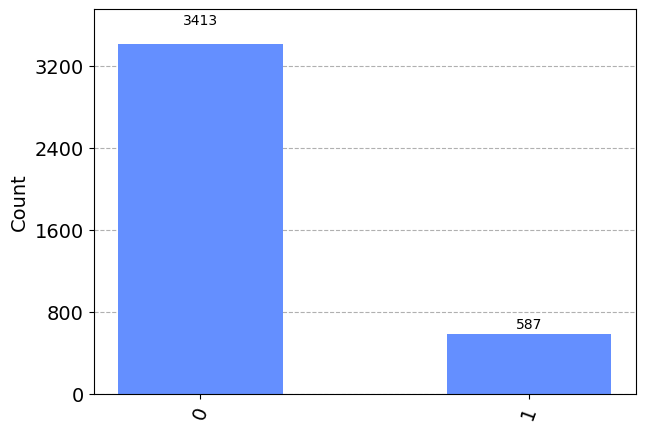

In [23]:
statistics = v.sample_counts(4000)  #Doing 4000 measurements of the system
plot_histogram(statistics)